# Data loading

In [320]:
import pandas as pd
from matplotlib import pyplot as plt

In [321]:
df_data = pd.read_csv("./exam_data.csv")
df_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:01:04,2016-02-01 00:04:14,1,1.50,-73.976166,40.740108,1,N,...,6.0,0.5,0.5,1.00,0.00,0.3,8.30,False,True,False
1,2,2,2016-02-19 20:50:16,2016-02-19 21:11:04,2,3.59,-73.962448,40.763321,1,N,...,15.5,0.5,0.5,0.00,0.00,0.3,16.80,False,True,True
2,3,1,2016-02-19 20:50:37,2016-02-19 21:02:00,1,1.70,-73.991402,40.732143,1,N,...,9.0,0.5,0.5,1.00,0.00,0.3,11.30,False,True,False
3,4,1,2016-02-19 20:51:07,2016-02-19 21:06:48,1,5.90,-74.014999,40.713940,1,N,...,19.5,0.5,0.5,4.15,0.00,0.3,24.95,True,True,False
4,5,2,2016-02-19 20:52:16,2016-02-19 21:03:09,1,2.93,-73.960510,40.761551,1,N,...,11.5,0.5,0.5,2.56,0.00,0.3,15.36,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,28450,2,2016-02-28 23:43:47,2016-02-28 23:52:44,1,2.64,-73.983849,40.747086,1,N,...,10.0,0.5,0.5,2.26,0.00,0.3,13.56,True,True,False
28450,28451,2,2016-02-28 23:51:44,2016-02-29 00:06:32,1,8.15,-73.873001,40.774117,1,N,...,24.0,0.5,0.5,6.17,5.54,0.3,37.01,True,True,False
28451,28452,2,2016-02-28 23:57:03,2016-02-29 00:06:35,5,2.46,-73.962769,40.766151,1,N,...,10.0,0.5,0.5,1.00,0.00,0.3,12.30,False,True,False
28452,28453,2,2016-02-28 23:58:00,2016-02-29 00:06:14,1,2.14,-73.999641,40.728298,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,False,True,True


In [322]:
df_data.iloc[:, 1:].describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,1.539573,1.665636,13.358754,-72.775920,40.090976,1.036164,-72.868727,40.143351,1.331412,17.784110,0.330553,0.497915,1.765711,0.288167,0.299779,20.966234
std,0.498440,1.318273,1772.032153,9.339516,5.145008,0.276658,8.973107,4.943346,0.486083,917.744742,0.455841,0.034726,2.529904,1.336268,0.010816,917.886875
min,1.000000,0.000000,0.000000,-74.465233,0.000000,1.000000,-74.465332,0.000000,1.000000,-52.000000,-1.000000,-0.500000,-0.070000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,0.980000,-73.991821,40.736604,1.000000,-73.991188,40.734573,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.630000,-73.981644,40.753096,1.000000,-73.979576,40.754093,1.000000,9.000000,0.000000,0.500000,1.320000,0.000000,0.300000,11.400000
75%,2.000000,2.000000,3.050000,-73.966927,40.767731,1.000000,-73.962227,40.769567,2.000000,14.000000,0.500000,0.500000,2.320000,0.000000,0.300000,17.150000
max,2.000000,6.000000,298914.200000,0.000000,41.109280,5.000000,0.000000,41.109280,4.000000,154810.430000,20.550000,1.160000,135.000000,21.000000,0.300000,154832.140000


# Data cleansing

### Check datatypes

In [323]:
df_data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
GoodTip                     bool
Extra                       bool
Cash                        bool
dtype: object

### Check for null values

In [324]:
print(df_data.columns[df_data.isna().any()].tolist())

[]


### Remove duplicates

In [325]:
df_data = df_data.drop_duplicates()

### Exclude rows with negative price amounts

In [326]:
df_data = df_data.loc[(df_data.total_amount >= 0)]
df_data.shape

(28446, 23)

In [327]:
df_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000,28446.000000
mean,14227.299023,1.539443,1.665366,13.362433,-72.775589,40.090794,1.036103,-72.868422,40.143185,1.330908,17.793594,0.330734,0.498195,1.766208,0.288248,0.299947,20.976925
std,8214.247438,0.498451,1.318148,1772.281309,9.340809,5.145720,0.276579,8.974350,4.944031,0.485188,917.873547,0.455740,0.030432,2.530087,1.336448,0.003977,918.015654
min,1.000000,1.000000,0.000000,0.000000,-74.465233,0.000000,1.000000,-74.465332,0.000000,1.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000
25%,7114.250000,1.000000,1.000000,0.990000,-73.991821,40.736608,1.000000,-73.991188,40.734574,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.630000,-73.981647,40.753096,1.000000,-73.979576,40.754093,1.000000,9.000000,0.000000,0.500000,1.320000,0.000000,0.300000,11.400000
75%,21340.750000,2.000000,2.000000,3.050000,-73.966927,40.767731,1.000000,-73.962227,40.769572,2.000000,14.000000,0.500000,0.500000,2.320000,0.000000,0.300000,17.150000
max,28454.000000,2.000000,6.000000,298914.200000,0.000000,41.109280,5.000000,0.000000,41.109280,4.000000,154810.430000,20.550000,1.160000,135.000000,21.000000,0.300000,154832.140000


### Exclude rows with 0 passenger amount

Zero passenger amount is hardly explainable and is hard to predict, especially because there are too few of them.

In [328]:
df_data[df_data.passenger_count == 0].passenger_count.count()

2

In [329]:
df_data = df_data[df_data.passenger_count != 0]

# Data exploration

Text(0.5, 0, 'Fare Amount USD')

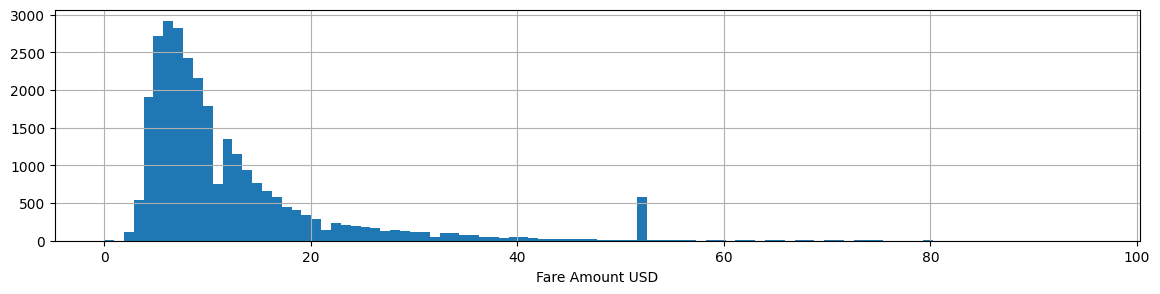

In [330]:
%matplotlib inline

df_data[df_data.fare_amount < 100].fare_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Fare Amount USD")

From this histogram, we can see that most trips in New York have fare amount of less than $20 USD. To be more precise, 75-th percentile of the fare amount is equal to 14.

In [331]:
df_data.total_amount.quantile([.75, .9, .999])

0.750     17.15000
0.900     27.95000
0.999    106.31192
Name: total_amount, dtype: float64

Quantiles show that 99% of total amount is less than 100.7638. Let's remove the outliers.

In [332]:
df_data = df_data[df_data.total_amount < 100]

Text(0.5, 0, 'Total Amount USD')

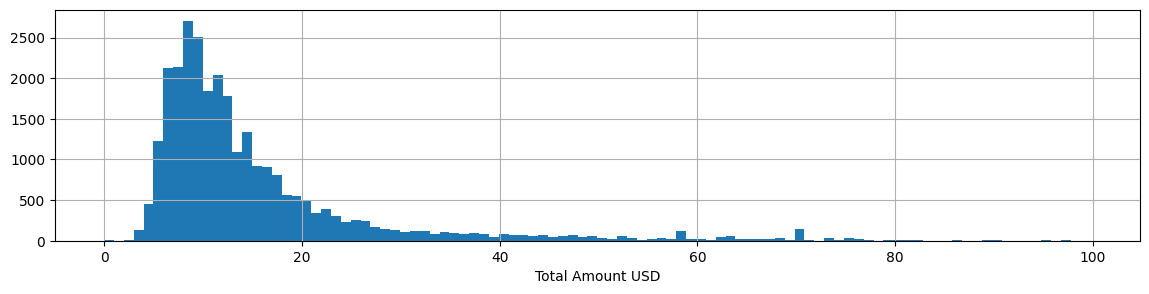

In [333]:
df_data[df_data.total_amount < 100].total_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Total Amount USD")

From this histogram, we can see that most trips in New York have total price of less than $20 USD. To be more precise, 75-th percentile is equal to 17.15.

Both histograms contain a spike or multiple spikes between 40 and 60 USD. This may indicate some fixed-price routes, such as trips to airports. There are three airports in New York which explains multiple spikes.

## Hypotheses

Our exploration helped us shape the following hypothesis
1. Certain routes have fixed-rate and result in the same total amounts.

We can also state these basic intuitions

2. Total amount correlates with the length of the trip.
3. Total amount depends on the time of day.

## Validating the hypotheses

> 1. Certain routes have fixed-rate and result in the same total amounts.

Most rides have standard rate code. Let's check how many rides there are with other rate codes. Value counts show that "Nassau or Westchester" and "Newark" are not well-represented in the dataset.

#### Explanation of codes


| Type                  | Code |
|-----------------------|------|
| Standard rate         | 1    |
| JFK                   | 2    |
| Newark                | 3    |
| Nassau or Westchester | 4    |
| Negotiated fare       | 5    |
| Group ride            | 6    |

In [397]:
df_data.RatecodeID.value_counts()

1    27153
2      476
5       44
3       28
4        5
Name: RatecodeID, dtype: int64

In [426]:
from enum import Enum

class HotspotCoordinates(Enum):
    # Source maps.google.com

    jfk = (-73.8148421, 40.6544961)  # John F. Kennedy International Airport
    lga = (-74.0140416, 40.7769271)  # LaGuardia Airport
    nwl = (-74.1744624, 40.6895314)  # Newark Liberty International Airport

In [427]:
def plot_total_amount_to(coords: HotspotCoordinates, ax, d_range=5):
    from geopy import distance

    key = "distance_to_" + coords.name

    df_data["pickup_" + key] = df_data.apply(
        lambda row: \
        distance.geodesic(
            (row.pickup_longitude, row.pickup_latitude), (coords.value[0], coords.value[1])
        ).km,
        axis=1
    )

    df_data[df_data["pickup_" + key] < d_range].total_amount.hist(bins=100, ax=ax[0])
    ax[0].set_xlabel("Total amount, $")
    ax[0].set_title("Histogram of pickup points within {} km of {}".format(d_range, coords.name))

    df_data["dropoff_" + key] = df_data.apply(
        lambda row: \
        distance.geodesic(
            (row.dropoff_longitude, row.dropoff_latitude), (coords.value[0], coords.value[1])
        ).km,
        axis=1
    )

    df_data[df_data["dropoff_" + key] < d_range].total_amount.hist(bins=100, ax=ax[1])
    ax[1].set_xlabel("Total amount, $")
    ax[1].set_title("Histogram of dropoff points within {} km of {}".format(d_range, coords.name))

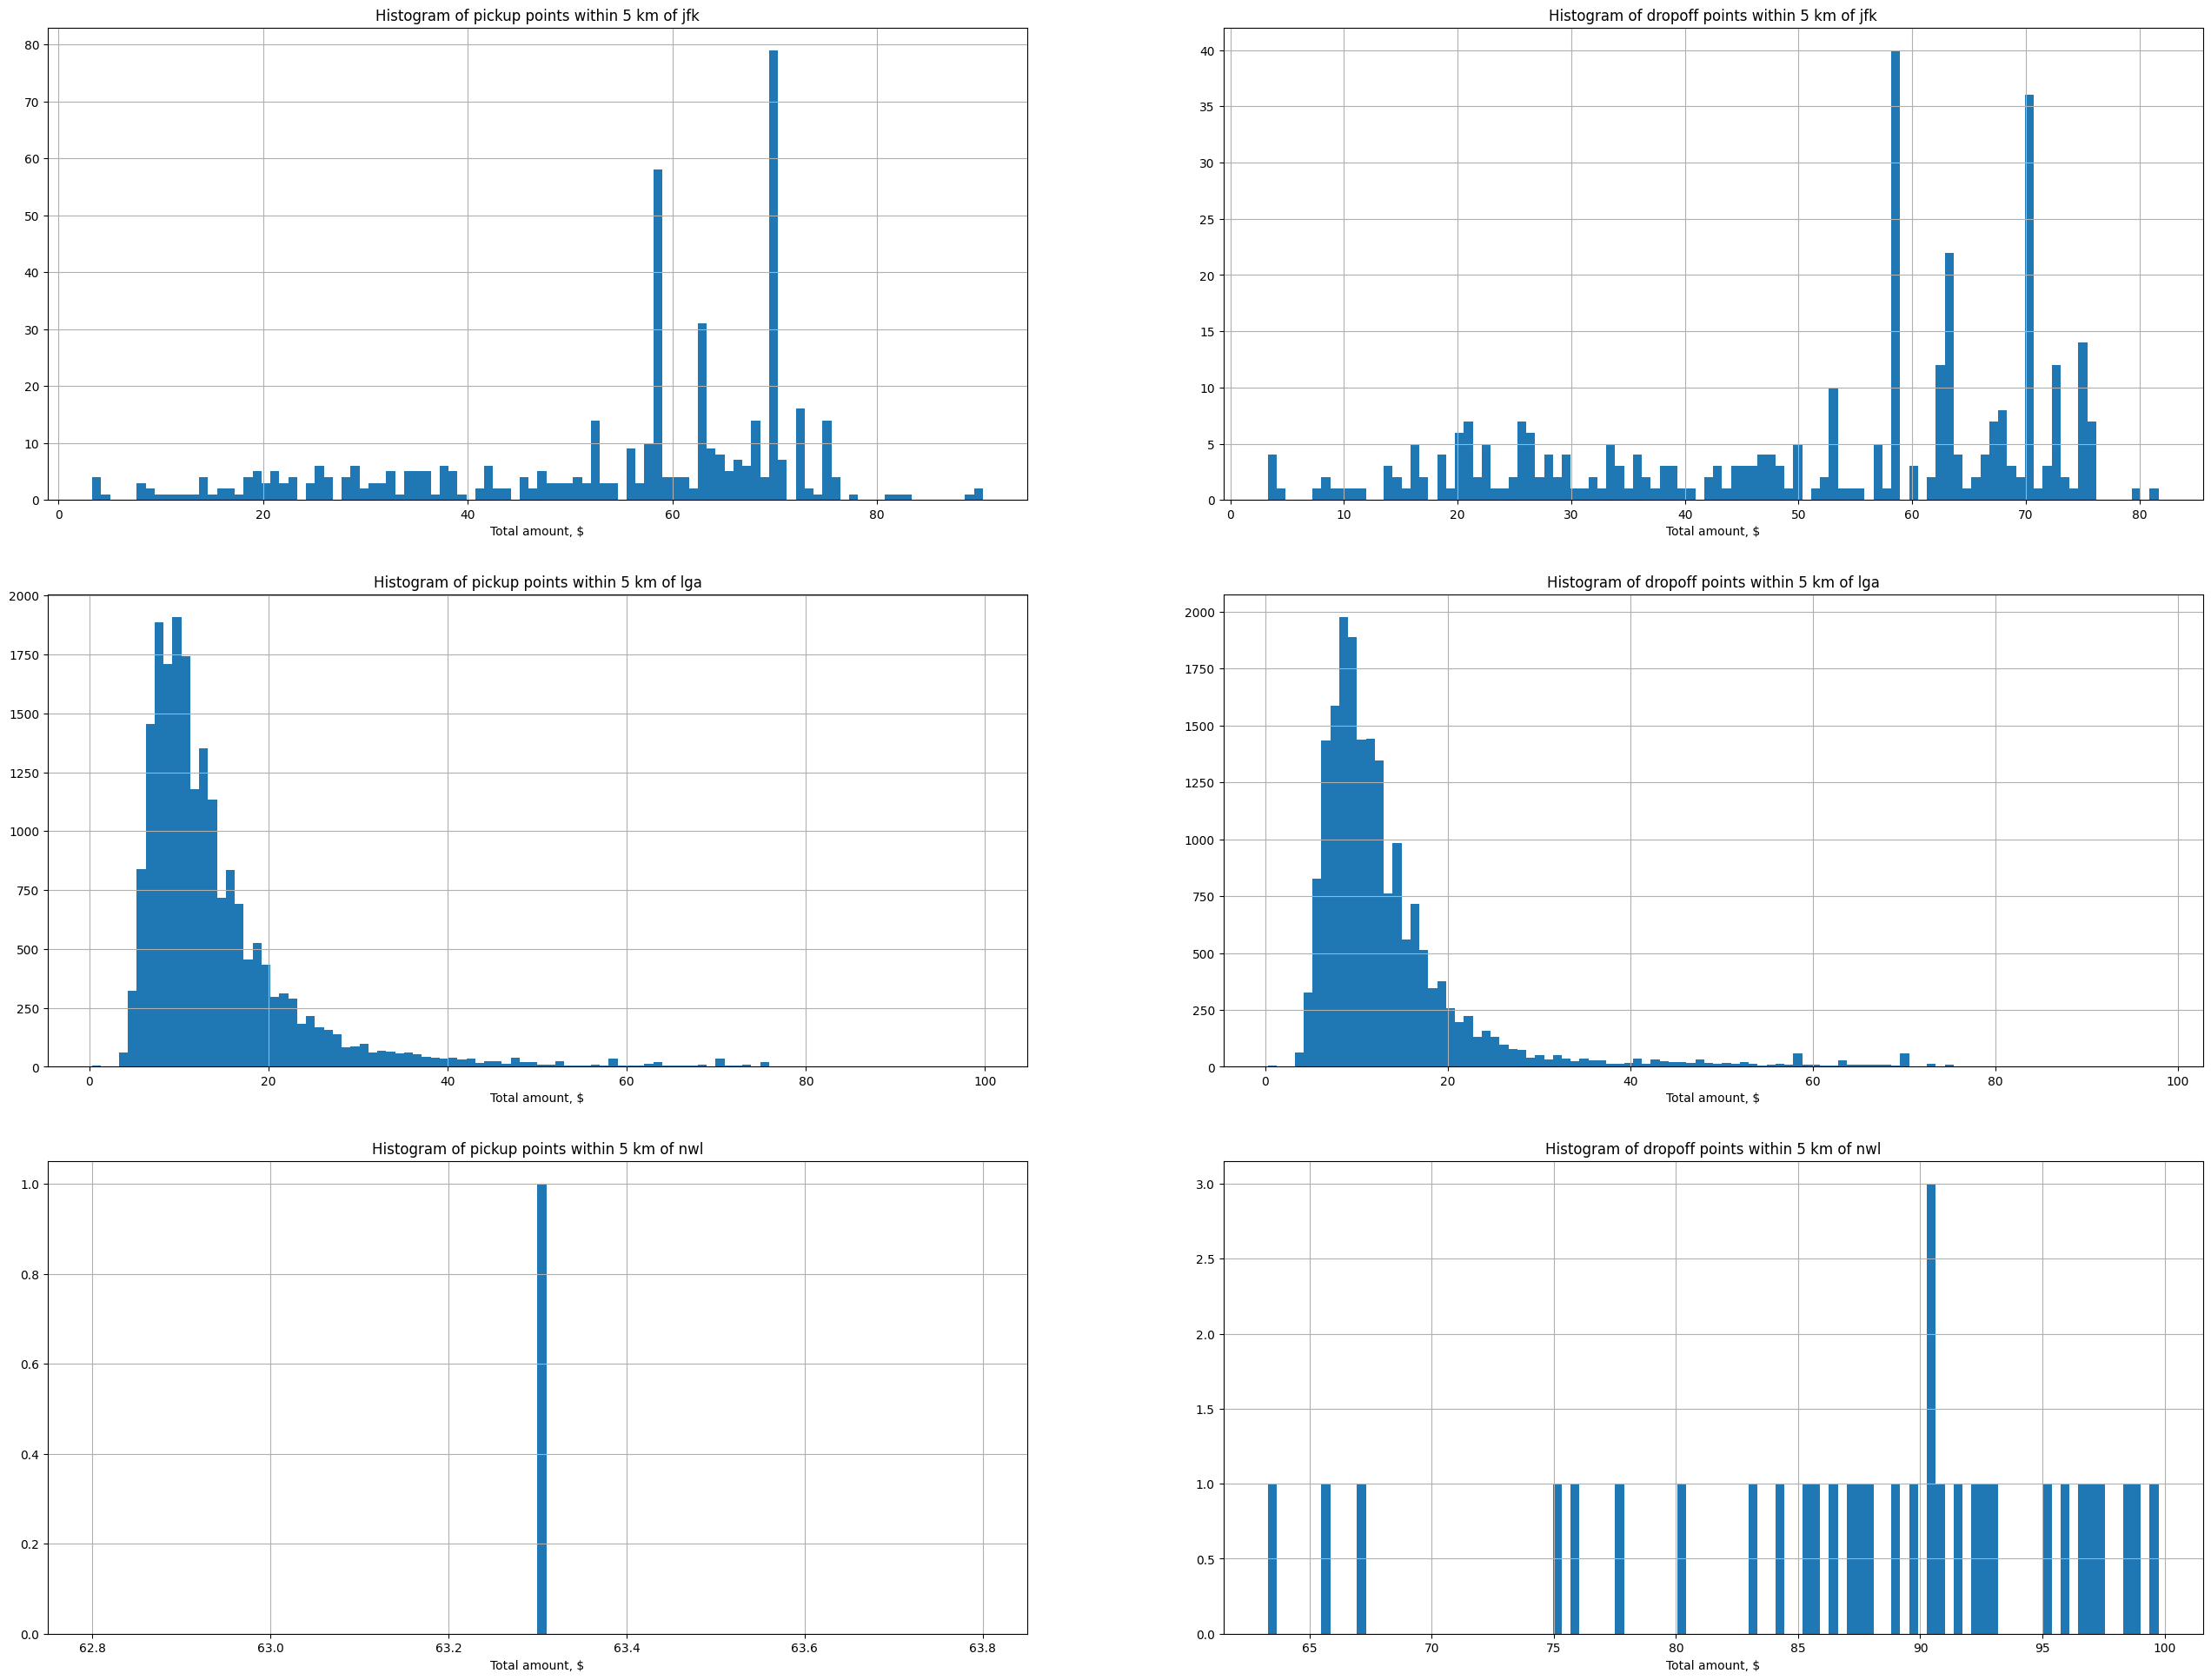

In [429]:
fig, axis = plt.subplots(3, 2, figsize=(32, 24))
plot_total_amount_to(HotspotCoordinates.jfk, axis[0])
plot_total_amount_to(HotspotCoordinates.lga, axis[1])
plot_total_amount_to(HotspotCoordinates.nwl, axis[2])

Fixed price tendency can be seen for the direction of LaGuardia airport. However, in the case of JFK it is not obvious.

> 2. Total amount correlates with the length of the trip.

We will compute flying distance between the points. This could give us a good perspective on data, although it might also produce garbage results on certain occasions:

1. When the trip is from point A to the same point A.
2. Some trips can be very long, but the resulting distance can be short, since we do not have access to intermediate stops.

Generally, the flying distance is the shortest path possible and a real car trip distance is usually longer.

In [334]:
from geopy import distance

In [368]:
df_data["distance_km"] = df_data.apply(
    lambda row: \
       distance.geodesic(
           (row.pickup_longitude, row.pickup_latitude), (row.dropoff_longitude, row.dropoff_latitude)
       ).km,
    axis=1
)

In [336]:
df_data.distance_km.describe()

count    28403.000000
mean        22.133949
std        330.867932
min          0.000000
25%          0.503569
50%          0.924399
75%          1.719613
max       5387.471285
Name: distance_km, dtype: float64

In [337]:
df_data.distance_km.quantile([.75, 0.9, .99])

0.75     1.719613
0.90     3.420791
0.99    14.439654
Name: distance_km, dtype: float64

From the percentiles data, we can see that 99% of rides have distances that are less than 15 km.

<AxesSubplot: >

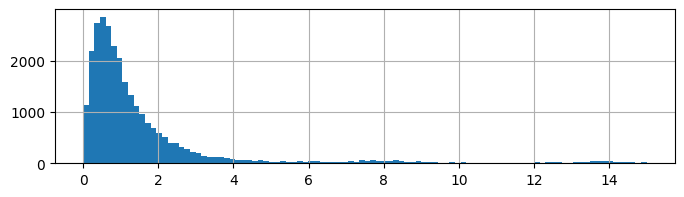

In [338]:
df_data[df_data.distance_km < 15].distance_km.hist(bins=100, figsize=(8, 2))

The histogram illustrates that 90% of the distances are less than 3.4 km. It also indicates two spikes at around 8 and 14 km, which might correspond to the trips to the NY airports. Let's remove outliers.

In [339]:
df_data = df_data[df_data.distance_km < 15]

Let us see how passengers count influences the distance and total price amount.

In [340]:
df_data.groupby("passenger_count")[["distance_km", "total_amount"]].quantile([.01, .9, .99])

distance_km  total_amount
passenger_count                                
1               0.01     0.000000        4.3000
                0.90     3.093375       26.7960
                0.99    13.395411       68.1424
2               0.01     0.000000        4.8000
                0.90     3.538804       28.6320
                0.99    13.821443       69.9900
3               0.01     0.000000        4.8000
                0.90     3.816577       28.5590
                0.99    13.810174       69.9918
4               0.01     0.000000        4.3000
                0.90     3.024598       26.2060
                0.99    13.639972       70.0064
5               0.01     0.000000        4.4170
                0.90     3.800291       29.5250
                0.99    13.830710       70.0100
6               0.01     0.023283        4.8000
                0.90     3.020187       26.6200
                0.99    13.383622       66.2176

Some zero-distance trips have non-zero total price amounts, which is not very sensible. Let's remove them

In [354]:
df_data = df_data[~((df_data.distance_km == 0) & (df_data.total_amount != 0))]

In [352]:
df_data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,distance_km
count,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000,27706.000000
mean,14233.915325,1.543745,1.669891,2.786579,-73.974941,40.751523,1.026095,-73.973867,40.752225,1.330578,12.089441,0.329062,0.498863,1.714489,0.270004,0.299978,15.201838,1.671906
std,8225.104757,0.498092,1.322672,3.322603,0.034930,0.026692,0.218123,0.033342,0.031513,0.484416,9.531079,0.427529,0.023816,2.183806,1.264428,0.002549,11.860155,2.353389
min,1.000000,1.000000,1.000000,0.000000,-74.159515,40.602329,1.000000,-74.188065,40.560780,1.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000073
25%,7100.250000,1.000000,1.000000,0.990000,-73.991972,40.738052,1.000000,-73.991249,40.736012,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,0.518418
50%,14237.000000,2.000000,1.000000,1.630000,-73.981987,40.753979,1.000000,-73.979866,40.754795,1.000000,9.000000,0.000000,0.500000,1.305000,0.000000,0.300000,11.300000,0.934025
75%,21363.750000,2.000000,2.000000,3.010000,-73.968193,40.768114,1.000000,-73.963448,40.769970,2.000000,14.000000,0.500000,0.500000,2.300000,0.000000,0.300000,17.000000,1.711159
max,28454.000000,2.000000,6.000000,28.800000,-73.731010,41.012882,5.000000,-73.652260,41.012882,4.000000,85.000000,6.000000,0.500000,42.800000,21.000000,0.300000,99.750000,14.996645


Text(0.5, 1.0, '3. Distance < 5, total amount < 10')

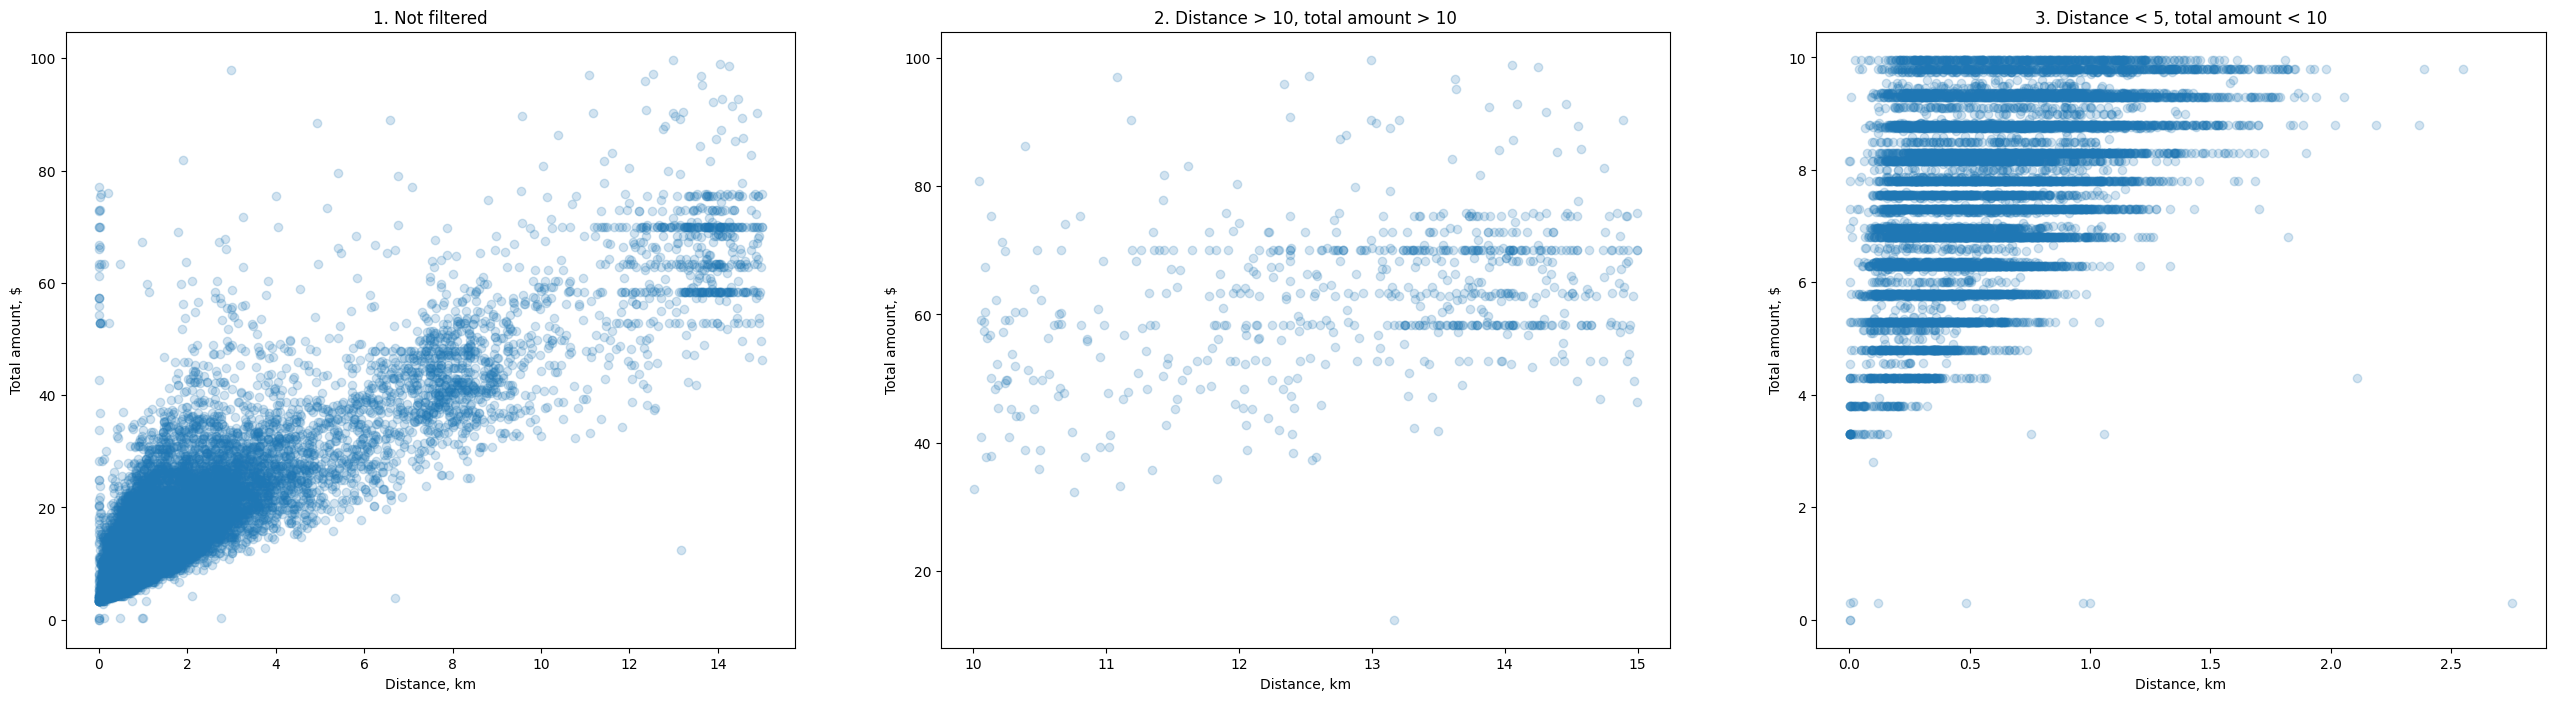

In [363]:
_, axs = plt.subplots(1, 3, figsize=(32, 8))
axs[0].scatter(
    df_data.distance_km,
    df_data.total_amount,
    alpha=0.2,
)

axs[0].set_ylabel("Total amount, $")
axs[0].set_xlabel("Distance, km")
axs[0].set_title("1. Not filtered")

predicate = (df_data.distance_km > 10) & (df_data.total_amount > 10)
axs[1].scatter(
    df_data[predicate].distance_km,
    df_data[predicate].total_amount,
    alpha=0.2,
)
axs[1].set_ylabel("Total amount, $")
axs[1].set_xlabel("Distance, km")
axs[1].set_title("2. Distance > 10, total amount > 10")

predicate = (df_data.distance_km < 5) & (df_data.total_amount < 10)
axs[2].scatter(
    df_data[predicate].distance_km,
    df_data[predicate].total_amount,
    alpha=0.2,
)
axs[2].set_ylabel("Total amount, $")
axs[2].set_xlabel("Distance, km")
axs[2].set_title("3. Distance < 5, total amount < 10")

#### 1. Not filtered
* The 1st plot shows a few trips with a distance that is greater than 6 km but with a lower total amount than the rest. Perhaps, these are discounted trips.
* The spread of total amount reduces as the distance decreases, which makes sense since the price is lower for shorter trips.

#### 2. Distance > 10, total amount > 10
* Straight lines on the 2nd plot might indicate fixed-fare long distance trips to airports or other possible hotspot locations.

#### 3. Distance < 5, total amount < 10
* Straight lines on the 3rd plot indicate that total amounts tend to integer values. This also reveals that many trips have fixed prices.

Apparently, knowing just distance is not enough to predict total amount. Even though the price tends to increase as the distance grows, the spread also increases.